# State schema with DataClasses

when we define a LangGraph StateGraph, we use a state schema.

The state schema represents the structure and types of data that our graph will use.

All nodes are expected to communicate with that schema.

LangGraph offers flexiblility in how you define your state schema, accommodating various python types and validation approaches!

- We can use the TypedDict class from python's typing module.

- It allows you to specify keys and their corresponding value types.

- But, note that these are type hints.

- They can be used by static type checker (like mypy) or IDEs to catch potential type-related errors befor the code is run

- But they are not enforced at runtime!

In [34]:
from typing_extensions import TypedDict
from typing import Literal


class TypedDictState(TypedDict):
    name: str
    game: Literal['cricket', 'badminton']
    

In [57]:
def play_game(state: TypedDictState):
    print('--- Play Game node has been called ---')
    return {"name": state['name'] + ' want to play '}

def cricket(state: TypedDictState):
    print('---Cricket node has been called---')
    return {"name":state['name']+" cricket","game": "cricket"}

def badminton(state: TypedDictState):
    print('---Badminton node has been called---')
    return {"name":state['name']+" badminton","game": "badminton"}

In [58]:
import random

def decide_play(state: TypedDictState)-> Literal['cricket','badminton']:
    print('---Decide Play node has been called---')
    if random.random() < 0.5: return "cricket"
    return 'badminton'

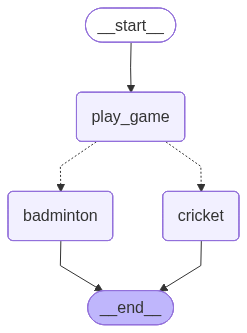

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	play_game(play_game)
	cricket(cricket)
	badminton(badminton)
	__end__([<p>__end__</p>]):::last
	__start__ --> play_game;
	play_game -.-> badminton;
	play_game -.-> cricket;
	badminton --> __end__;
	cricket --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



In [59]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END


graph = StateGraph(TypedDictState)
graph.add_node('play_game', play_game)
graph.add_node('cricket', cricket)
graph.add_node('badminton', badminton)

graph.add_edge(START, 'play_game')
graph.add_conditional_edges('play_game', decide_play)
graph.add_edge('cricket', END)
graph.add_edge('badminton', END)

graph_builder = graph.compile()

## View
display(Image(graph_builder.get_graph().draw_mermaid_png()))
mermaid_code = graph_builder.get_graph().draw_mermaid()

print(mermaid_code)

In [60]:
graph_builder.invoke({"name":"boon sai"})

--- Play Game node has been called ---
---Decide Play node has been called---
---Cricket node has been called---


{'name': 'boon sai want to play  cricket', 'game': 'cricket'}

# Pydantic

Instead of typeddict, use Pydantic for enforced checker 

# Data classes

Python's dataclasses provide another way to define structured data.

Dataclasses offer a concise syntax for creating classes that are primarily used to store data.

In [65]:
from dataclasses import dataclass

@dataclass
class DatacClassState:
    name: str
    game: Literal['cricket', 'badminton']
    


In [68]:
def play_game(state: DatacClassState):
    print('--- Play Game node has been called ---')
    return {"name": state.name + ' want to play '} # here we use state.name in data clasees where typed dict uses state['name']

def cricket(state: DatacClassState):
    print('---Cricket node has been called---')
    return {"name":state.name +" cricket","game": "cricket"}

def badminton(state: DatacClassState):
    print('---Badminton node has been called---')
    return {"name": state.name +" badminton","game": "badminton"}

In [69]:
import random

def decide_play(state: DatacClassState)-> Literal['cricket','badminton']:
    print('---Decide Play node has been called---')
    if random.random() < 0.5: return "cricket"
    return 'badminton'

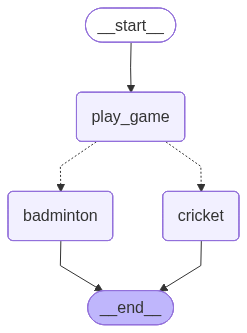

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	play_game(play_game)
	cricket(cricket)
	badminton(badminton)
	__end__([<p>__end__</p>]):::last
	__start__ --> play_game;
	play_game -.-> badminton;
	play_game -.-> cricket;
	badminton --> __end__;
	cricket --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



In [70]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END


graph = StateGraph(TypedDictState)
graph.add_node('play_game', play_game)
graph.add_node('cricket', cricket)
graph.add_node('badminton', badminton)

graph.add_edge(START, 'play_game')
graph.add_conditional_edges('play_game', decide_play)
graph.add_edge('cricket', END)
graph.add_edge('badminton', END)

graph_builder = graph.compile()

## View
display(Image(graph_builder.get_graph().draw_mermaid_png()))
mermaid_code = graph_builder.get_graph().draw_mermaid()

print(mermaid_code)

In [72]:
graph_builder.invoke(DatacClassState(name="Boon sai", game="badminton"))

--- Play Game node has been called ---
---Decide Play node has been called---
---Cricket node has been called---


{'name': 'Boon sai want to play  cricket', 'game': 'cricket'}